In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #does standardization for you
from category_encoders import OrdinalEncoder, OneHotEncoder #has around 13 different methods
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

In [2]:
#import train and test datasets
train = pd.read_csv('data/iowa_housing_full/train.csv')
test = pd.read_csv('data/iowa_housing_full/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#declare 'Sale Price' as y, store Ids and drop from train and test datasets
train_id = train['Id']
test_id = test['Id']
y = train['SalePrice']
train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# Exploratory Data Analysis
Breaking apart the data to better understand the features 

In [6]:
#observe data 
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [7]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
#which columns are numerical and categorical?
categorical_cols = train.select_dtypes(include='object').columns.tolist()
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
#numerical columns
numerical_cols = train.select_dtypes(exclude='object').columns.tolist()
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Target Variable Analysis

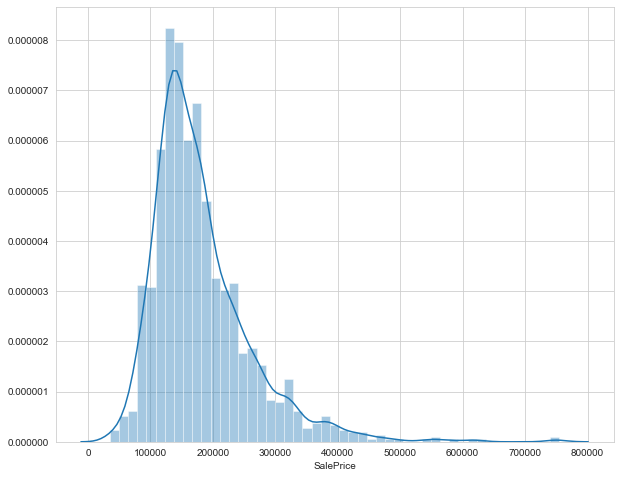

In [10]:
#let's first analyze the target variable: SalePrice
plt.figure(figsize=(10, 8))
sns.distplot(y);

In [11]:
#looks like target variable is highly skewed
print('Skew:', y.skew(), '\nKurtosis:', y.kurt())

Skew: 1.8828757597682129 
Kurtosis: 6.536281860064529


In [12]:
#min and max
print('Min:', np.min(y), '\nMax:', np.max(y))

Min: 34900 
Max: 755000


Skew: 0.12133506220520406 
Kurtosis: 0.8095319958036296


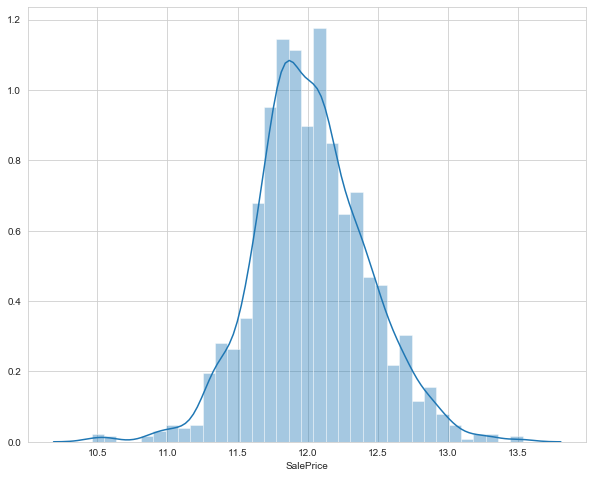

In [13]:
# skewed to the right and high tail points --> log the target variable to normalize
#we can use log(y) to be our target variable: weight's sample equally and outliers don't impact weight
plt.figure(figsize=(10, 8))
sns.distplot(np.log(y))

print('Skew:', np.log(y).skew(), '\nKurtosis:', np.log(y).kurt())

In [14]:
y = np.log(y)

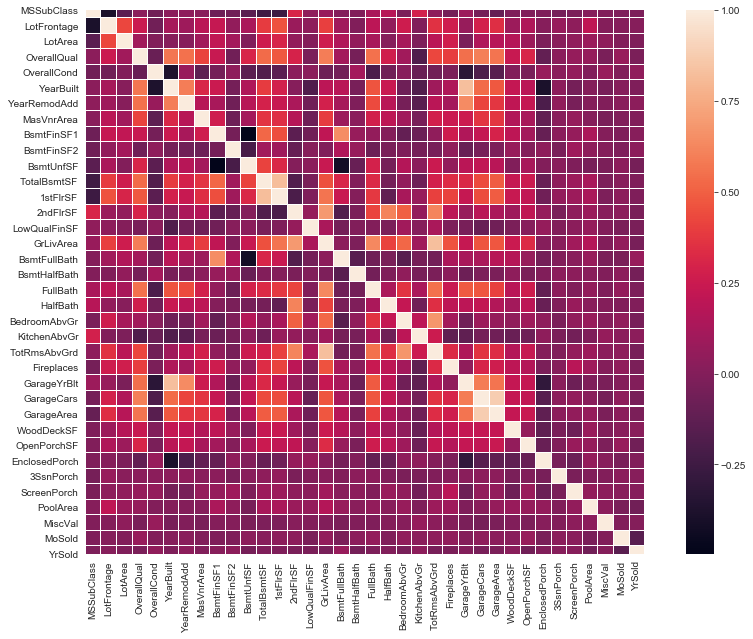

In [15]:
#what features are important to predict Sales Price? Are there any features we should omit or be aware of?
#using heatmap to determine correlation 
corrmat = train.corr()
plt.figure(figsize=(15, 10))

sns.heatmap(corrmat, square=True, linewidth=0.01);

TotalBsmttSF and 1stFlrSF look highly correlated

GarageCars and GarageArea look highly correlated 

       Are they instances of multicollinearity?


It seems as though features regarding basements and garage are correlated

    Makes sense as some houses probably didn't have basements or garages, vice-versa

## Imputing Missing Values

In [16]:
#null values?
train.loc[:, train.isnull().sum() > 1].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
test.loc[:, test.isnull().sum() > 1].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [18]:
#looks like some columns have a lot of null values. 
#maybe some of the columns with high null values, we can drop completely 

#Look into the percentage against the rest of the column

print('Null values in train dataset:')
for cols in train.columns.tolist():
    if train[cols].isnull().sum() > 0:
        print(format(cols, "<15"),
        format(train[cols].isnull().sum() / len(train[cols])*100, ".2f"), '% of null values in column', sep='')

Null values in train dataset:
LotFrontage    17.74% of null values in column
Alley          93.77% of null values in column
MasVnrType     0.55% of null values in column
MasVnrArea     0.55% of null values in column
BsmtQual       2.53% of null values in column
BsmtCond       2.53% of null values in column
BsmtExposure   2.60% of null values in column
BsmtFinType1   2.53% of null values in column
BsmtFinType2   2.60% of null values in column
Electrical     0.07% of null values in column
FireplaceQu    47.26% of null values in column
GarageType     5.55% of null values in column
GarageYrBlt    5.55% of null values in column
GarageFinish   5.55% of null values in column
GarageQual     5.55% of null values in column
GarageCond     5.55% of null values in column
PoolQC         99.52% of null values in column
Fence          80.75% of null values in column
MiscFeature    96.30% of null values in column


In [19]:
#we see that Alley, FirePlaceQu, PoolQC, Fence and MiscFeatures have high null values in proportion to it's data
#let's see if they are meaningful; if it isn't, we can drop them
#train['Alley'].value_counts()

In [20]:
#train['PoolQC'].value_counts()

In [21]:
#train['Fence'].value_counts()

In [22]:
#train['MiscFeature'].value_counts()

In [23]:
#It clearly looks like Alley, PoolQC and MiscFeature have very few datapoints. Let's drop them. 
#train.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

In [24]:
#test.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

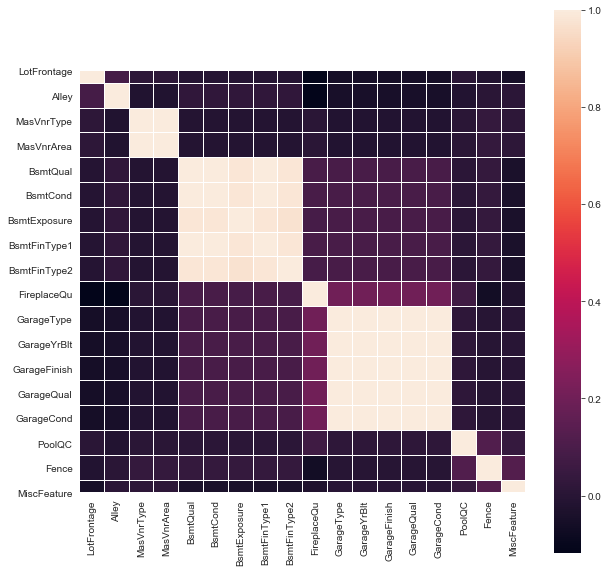

In [25]:
#many columns have equal null values, which suggests high correlations with similar columns

#test and train datasets have different null values as well 
train_null_cols = train.loc[:, train.isnull().sum() > 1].columns.tolist()
train_null = train[train_null_cols].isnull().corr()

#look into correlation
plt.figure(figsize=(10, 10))
sns.heatmap(train_null, linewidths=0.01, square=True);

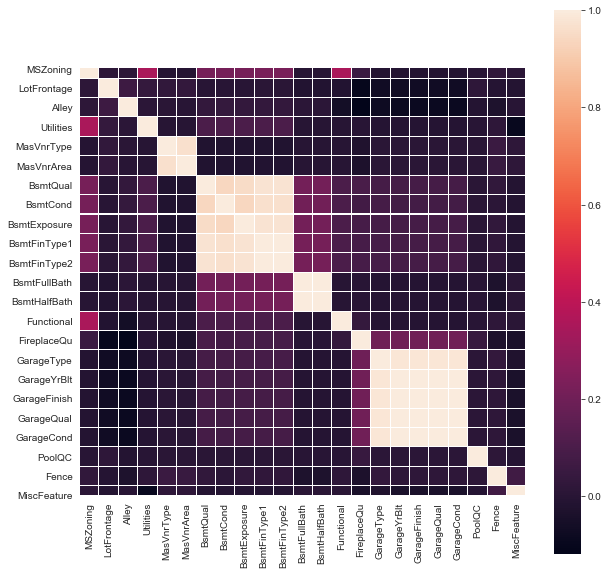

In [26]:
#for test dataset - has more columns with null values
test_null_cols = test.loc[:, test.isnull().sum() > 1].columns.tolist()
test_null = test[test_null_cols].isnull().corr()
plt.figure(figsize=(10, 10))
sns.heatmap(test_null, linewidth=0.01, square=True);

In [27]:
#breaking down each columns with null values 
#from description.txt, we can better understand the meaning of these columns

#LotFrontage: Linear feet of street connected to property
train[train['LotFrontage'].isnull()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal


In [28]:
#looks like LotFrontage null values represent is missing at random -> let's replace with mean
lotfrontage_mean = train['LotFrontage'].mean()
train['LotFrontage'].fillna(lotfrontage_mean, inplace=True)
test['LotFrontage'].fillna(lotfrontage_mean, inplace=True)

In [29]:
#Alley: Type of alley access to property
       #Grvl	Gravel
       #Pave	Paved
       #NA 	No alley access

#train[train['Alley'].isnull()].head()

In [30]:
#1369 null values; categorical with NA representing no alley access --> let's fill those in with None
#train['Alley'].fillna('None', inplace=True)
#test['Alley'].fillna('None', inplace=True)

In [31]:
#MasVnrType: Masonry veneer type
       #BrkCmn	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #None	None
       #Stone	Stone
#MasVnrArea: Masonry veneer area in square feet

train[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    8
MasVnrArea    8
dtype: int64

In [32]:
#looks like they represent the same null rows
train[train['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [33]:
#fill MasVnrType with None and area with 0
train['MasVnrType'].fillna('None', inplace=True)
test['MasVnrType'].fillna('None', inplace=True)

train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

In [34]:
#BsmtQual: Evaluates the height of the basement (Ex, Gd, TA, Fa, Po, NA)
#BsmtCond: Evaluates the general condition of the basement (Ex, Gd, TA, Fa, Po, NA)
#BsmtExposure: Refers to walkout or garden level walls (Gd, Av, Mn, No, NA)
#BsmtFinType1: Rating of basement finished area (GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA)
#BsmtFinType2: Rating of basement finished area (if multiple types) (GLQ, ALQ, BLQ, Rec, LwQ, Unf)

train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [35]:
test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
dtype: int64

In [36]:
train[train['BsmtExposure'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN


In [37]:
test['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [38]:
#null values represent No-basement --> fill with None
train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')
test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

In [39]:
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms

test[['BsmtFullBath','BsmtHalfBath']].isnull().sum()

BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [40]:
#missing vals only present in test data
test[test['BsmtFullBath'].isnull()][['BsmtFullBath', 'BsmtHalfBath']]

,BsmtFullBath,BsmtHalfBath
660,NaN,NaN
728,NaN,NaN


In [41]:
#although numeric, it's categorical (number of bathrooms) --> replace with mode (0)
test[['BsmtFullBath', 'BsmtHalfBath']] = test[['BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [42]:
#FireplaceQu: Fireplace quality
        #Ex	Excellent - Exceptional Masonry Fireplace
       #Gd	Good - Masonry Fireplace in main level
       #TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       #Fa	Fair - Prefabricated Fireplace in basement
       #Po	Poor - Ben Franklin Stove
       #NA	No Fireplace
        
print('Train dataset:', train['FireplaceQu'].isnull().sum(), '\nTest dataset:', test['FireplaceQu'].isnull().sum())

Train dataset: 690 
Test dataset: 730


In [43]:
train['FireplaceQu'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('None', inplace=True)

In [44]:
#GarageType: Garage location
       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
       #Fin	Finished
       #RFn	Rough Finished	
       #Unf	Unfinished
       #NA	No Garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
#GarageCond: Garage condition
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage

train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].isnull().sum()


GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

In [45]:
test[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].isnull().sum()


GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
dtype: int64

In [46]:
#GrageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond looks like they're highly correlated
#--> replace with None for all categories and 0 for numeric (no garages)
train[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']] = train[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']].fillna('None')
test[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']] = test[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']].fillna('None')

train['GarageYrBlt'].fillna(0, inplace=True)
test['GarageYrBlt'].fillna(0, inplace=True)

In [47]:
#null value in test dataset
test[['GarageCars','GarageArea']].isnull().sum()

#both are numeric and random --> replace with mean from training dataset
garagecars_mean = train['GarageCars'].mean()
garagearea_mean = train['GarageArea'].mean()

test['GarageCars'].fillna(garagecars_mean, inplace=True)
test['GarageArea'].fillna(garagearea_mean, inplace=True)

In [48]:
#PoolQC: Pool quality
       #Ex	Excellent
       #Gd	Good
       #TA	Average/Typical
       #Fa	Fair
       #NA	No Pool
print('Train dataset:', train['PoolQC'].isnull().sum(), '\nTest dataset:', test['PoolQC'].isnull().sum())

Train dataset: 1453 
Test dataset: 1456


In [49]:
#categorical and not random --> replace with None as it represents no pool
train['PoolQC'].fillna('None', inplace=True)
test['PoolQC'].fillna('None', inplace=True)

In [50]:
#Fence: Fence quality
       #GdPrv	Good Privacy
       #MnPrv	Minimum Privacy
       #GdWo	Good Wood
       #MnWw	Minimum Wood/Wire
       #NA	No Fence
print('Train dataset:', train['Fence'].isnull().sum(), '\nTest dataset:', test['Fence'].isnull().sum())

Train dataset: 1179 
Test dataset: 1169


In [51]:
#categorical and not random --> replace with None as it represents no fences
train['Fence'].fillna('None', inplace=True)
test['Fence'].fillna('None', inplace=True)

In [52]:
#MiscFeature: Miscellaneous feature not covered in other categories
       #Elev	Elevator
       #Gar2	2nd Garage (if not described in garage section)
       #Othr	Other
       #Shed	Shed (over 100 SF)
       #TenC	Tennis Court
       #NA	None
print('Train dataset:', train['MiscFeature'].isnull().sum(), '\nTest dataset:', test['MiscFeature'].isnull().sum())

Train dataset: 1406 
Test dataset: 1408


In [53]:
#categorical and not random --> represents No Miscellaneous features, thus replace with None
train['MiscFeature'].fillna('None', inplace=True)
test['MiscFeature'].fillna('None', inplace=True)

In [54]:
#check for Null Values
train.isnull().sum().sort_values(ascending=False)

Alley            1369
Electrical          1
SaleCondition       0
BsmtQual            0
Exterior1st         0
                 ... 
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
MSSubClass          0
Length: 79, dtype: int64

In [55]:
test.isnull().sum().sort_values(ascending=False).head(20)

Alley           1352
MSZoning           4
Functional         2
Utilities          2
TotalBsmtSF        1
Exterior2nd        1
KitchenQual        1
Exterior1st        1
BsmtUnfSF          1
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
BsmtFinType1       0
BsmtExposure       0
BsmtQual           0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
MasVnrType         0
dtype: int64

In [56]:
#1 null value remain in training dataset: Electrical
#Electrical: Electrical system
       #SBrkr	Standard Circuit Breakers & Romex
       #FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       #FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       #FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       #Mix	Mixed

#categorical / random --> replace with mode
electrical_mode = train['Electrical'].mode()[0]
train['Electrical'].fillna(electrical_mode, inplace=True)

In [57]:
#a few null values remain in the test dataset. we can look into it and replace accordingly
test[['MSZoning', 'Utilities', 'Functional', 'SaleType', 
      'BsmtUnfSF', 'BsmtFinSF2','BsmtFinSF1', 'Exterior1st',
     'Exterior2nd', 'KitchenQual', 'TotalBsmtSF']].isnull().sum()

MSZoning       4
Utilities      2
Functional     2
SaleType       1
BsmtUnfSF      1
BsmtFinSF2     1
BsmtFinSF1     1
Exterior1st    1
Exterior2nd    1
KitchenQual    1
TotalBsmtSF    1
dtype: int64

In [58]:
#MSZoning: Identifies the general zoning classification of the sale.
       #A	Agriculture
       #C	Commercial
       #FV	Floating Village Residential
       #I	Industrial
       #RH	Residential High Density
       #RL	Residential Low Density
       #RP	Residential Low Density Park 
       #RM	Residential Medium Density
        
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [59]:
#categorical / random --> let's replace with mode from train dataset
mszoning_mode = train['MSZoning'].mode()[0]
test['MSZoning'].fillna(mszoning_mode, inplace=True)

In [60]:
#Utilities: Type of utilities available
       #AllPub	All public Utilities (E,G,W,& S)
       #NoSewr	Electricity, Gas, and Water (Septic Tank)
       #NoSeWa	Electricity and Gas Only
       #ELO	Electricity only 

#categorical / random --> replace with mode from train dataset
utilities_mode = train['Utilities'].mode()[0]
test['Utilities'].fillna(utilities_mode, inplace=True)

In [61]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
       #Typ	Typical Functionality
       #Min1	Minor Deductions 1
       #Min2	Minor Deductions 2
       #Mod	Moderate Deductions
       #Maj1	Major Deductions 1
       #Maj2	Major Deductions 2
       #Sev	Severely Damaged
       #Sal	Salvage only

#categorical / random --> replace with mode from train dataset
functional_mode = train['Functional'].mode()[0]
test['Functional'].fillna(functional_mode, inplace=True)

In [62]:
#SaleType: Type of sale
       #WD 	Warranty Deed - Conventional
       #CWD	Warranty Deed - Cash
       #VWD	Warranty Deed - VA Loan
       #New	Home just constructed and sold
       #COD	Court Officer Deed/Estate
       #Con	Contract 15% Down payment regular terms
       #ConLw	Contract Low Down payment and low interest
       #ConLI	Contract Low Interest
       #ConLD	Contract Low Down
       #Oth	Other
test[test['SaleType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,10,2007,NaN,Normal


In [63]:
#looks like it was sold, but no sale type inputed / replace as 'other'
test['SaleType'].fillna('Oth', inplace=True)

In [64]:
#BsmtUnfSF: Unfinished square feet of basement area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinSF2: Type 2 finished square feet
#TotalBsmtSF: Total square feet of basement area

test[test['TotalBsmtSF'].isnull()][['BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']]

,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
660,NaN,NaN,NaN,NaN


In [65]:
test[['BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']].dtypes

BsmtUnfSF      float64
BsmtFinSF1     float64
BsmtFinSF2     float64
TotalBsmtSF    float64
dtype: object

In [66]:
#looks like basement null values are represent no basement --> replace with 0
test[['BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']] = test[['BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']].fillna(0)

In [67]:
#Exterior1st: Exterior covering on house
       #AsbShng	Asbestos Shingles
       #AsphShn	Asphalt Shingles
       #BrkComm	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #CemntBd	Cement Board
       #HdBoard	Hard Board
       #ImStucc	Imitation Stucco
       #MetalSd	Metal Siding
       #Other	Other
       #Plywood	Plywood
       #PreCast	PreCast	
       #Stone	Stone
       #Stucco	Stucco
       #VinylSd	Vinyl Siding
       #Wd Sdng	Wood Siding
       #WdShing	Wood Shingles
#Exterior2nd: Exterior covering on house (if more than one material)
       #AsbShng	Asbestos Shingles
       #AsphShn	Asphalt Shingles
       #BrkComm	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #CemntBd	Cement Board
       #HdBoard	Hard Board
       #ImStucc	Imitation Stucco
       #MetalSd	Metal Siding
       #Other	Other
       #Plywood	Plywood
       #PreCast	PreCast
       #Stone	Stone
       #Stucco	Stucco
       #VinylSd	Vinyl Siding
       #Wd Sdng	Wood Siding
       #WdShing	Wood Shingles
test[test['Exterior1st'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,1,2008,WD,Normal


In [68]:
#categorical / random --> fill with mode
exterior1st_mode = train['Exterior1st'].mode()[0]
exterior2nd_mode = train['Exterior2nd'].mode()[0]

test['Exterior1st'].fillna(exterior1st_mode, inplace=True)
test['Exterior2nd'].fillna(exterior2nd_mode, inplace=True)

In [69]:
#KitchenQual: Kitchen quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
#categorical/random --> fill with mode
kitchenqual_mode = train['KitchenQual'].mode()[0]
test['KitchenQual'].fillna(kitchenqual_mode, inplace=True)

In [70]:
#check for null values again
train.isnull().sum().sort_values(ascending=False)

Alley            1369
SaleCondition       0
Foundation          0
RoofMatl            0
Exterior1st         0
                 ... 
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
MSSubClass          0
Length: 79, dtype: int64

In [71]:
test.isnull().sum().sort_values(ascending=False)

Alley            1352
SaleCondition       0
Foundation          0
RoofMatl            0
Exterior1st         0
                 ... 
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
MSSubClass          0
Length: 79, dtype: int64

### Feature Engineering and Preprocessing

Preparing features/columns for modeling

In [72]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


In [73]:
#finding ordinal and nominal variables
#from the description document, we see that MSSubClass, OverallQual and OverallCond are numerical, 
#but represents categorical values ==> we can turn those into a string
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

train['OverallQual'] = train['OverallQual'].astype(str)
test['OverallQual'] = test['OverallQual'].astype(str)

train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

In [74]:
#mapping numerical values to the ordinal columns
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [75]:
#garage
garagefinish_mapping = {
    'None': 1,
    'Unf': 2,
    'Rfn': 3,
    'Fin': 4
}
garagefinish_col = {
    'col' : 'GarageFinish', 
    'mapping': garagefinish_mapping
}

In [76]:
#lotshape
lotshape_mapping = {
    'Reg' : 4,
    'IR1' : 3,
    'IR2' : 2,
    'IR3' : 1
}
lotshape_col = {
    'col' : 'LotShape',
    'mapping' : lotshape_mapping
}

In [77]:
#landslope
landslope_mapping = {
    'Gt1' : 1,
    'Mod' : 2,
    'Sev' : 3
}
landslope_col = {
    'col' : 'LandSlope',
    'mapping': landslope_mapping
}

In [78]:
#exterqual
exterqual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}
exterqual_col = {
    'col' : 'ExterQual',
    'mapping' : exterqual_mapping
}

In [79]:
#extercond
extercond_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}
extercond_col = {
    'col' : 'ExterCond',
    'mapping' : extercond_mapping
}

In [80]:
#BsmtQual
bsmtqual_mapping = {
    'Ex' : 6,
    'Gd' : 5,
    'TA' : 4,
    'Fa' : 3,
    'Po' : 2,
    'None' : 1
}
bsmtqual_col = {
    'col' : 'BsmtQual',
    'mapping' : bsmtqual_mapping
}

In [81]:
#BsmtCond
bsmtcond_mapping = {
    'Ex' : 6,
    'Gd' : 5,
    'TA' : 4,
    'Fa' : 3,
    'Po' : 2,
    'None' : 1
}
bsmtqual_cod = {
    'col' : 'BsmtQual',
    'mapping' : bsmtcond_mapping
}

In [82]:
#BsmtExposure
bsmtexposure_mapping = {
    'Gd' : 5,
    'Av' : 4,
    'Mn' : 3,
    'No' : 2,
    'None' : 1
}
bsmtexposure_col = {
    'col' : 'BsmtExposure',
    'mapping' : bsmtexposure_mapping
}

In [83]:
#BsmtFinType1
bsmtfintype1_mapping = {
    'GLQ' : 7,
    'ALQ' : 6,
    'BLQ' : 5,
    'Rec' : 4,
    'LwQ' : 3,
    'Unf' : 2,
    'None' : 1
}
bsmtfintype1_col = {
    'col' : 'BsmtFinType1',
    'mapping' : bsmtfintype1_mapping
}

In [84]:
#BsmtFinType2
bsmtfintype2_mapping = {
    'GLQ' : 7,
    'ALQ' : 6,
    'BLQ' : 5,
    'Rec' : 4,
    'LwQ' : 3,
    'Unf' : 2,
    'None' : 1
}
bsmtfintype2_col = {
    'col' : 'BsmtFinType2',
    'mapping' : bsmtfintype2_mapping
}

In [85]:
#HeatingQC
heatingqc_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}
heatingqc_col = {
    'col' : 'HeatingQC',
    'mapping' : heatingqc_mapping
}

In [86]:
#kitchenqual
kitchenqual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}
kitchenqual_col = {
    'col' : 'KitchenQual',
    'mapping' : kitchenqual_mapping
}

In [87]:
#FireplaceQu
fireplacequ_mapping = {
    'Ex' : 6,
    'Gd' : 5,
    'TA' : 4,
    'Fa' : 3,
    'Po' : 2,
    'None' : 1
}
fireplacequ_col = {
    'col' : 'FireplaceQu',
    'mapping' : fireplacequ_mapping
}

In [88]:
#GarageQual
garagequal_mapping = {
    'Ex' : 6,
    'Gd' : 5,
    'TA' : 4,
    'Fa' : 3,
    'Po' : 2,
    'None' : 1
}
garagequal_col = {
    'col' : 'GarageQual',
    'mapping' : garagequal_mapping
}

In [89]:
#GarageCond
garagecond_mapping = {
    'Ex' : 6,
    'Gd' : 5,
    'TA' : 4,
    'Fa' : 3,
    'Po' : 2,
    'None' : 1
}
garagecond_col = {
    'col' : 'GarageCond',
    'mapping' : garagecond_mapping
}

In [90]:
#store each dictionary in a list that we can pass through the ordinal transformation
col_mapping = [garagefinish_col, lotshape_col, landslope_col, exterqual_col, extercond_col, bsmtqual_col,
              bsmtqual_cod, bsmtexposure_col, bsmtfintype1_col, bsmtfintype2_col, heatingqc_col, kitchenqual_col,
              fireplacequ_col, garagequal_col, garagecond_col]

In [91]:
#Preprocessing: initialize instance of the ordinal transformation method
ore = OrdinalEncoder(mapping=col_mapping)

In [92]:
ore.fit_transform(train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,4,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,4,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,3,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,3,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,3,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,4,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,4,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,4,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,4,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2010,WD,Normal


In [93]:
#Preprocessing: Initialize the One-hot encoder
ohe = OneHotEncoder()
ohe.fit_transform(train)

,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,...,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1458,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
#Preprocessing: Initialize the Scaler - once all datasets are numerical
sc = StandardScaler()

# Cross Validation and Regularization

In [95]:
#let's first split 20% of our training dataset for validating our model
X_train, X_val, y_train, y_val = train_test_split(train, y, random_state=2020, test_size=0.2)

In [96]:
print('X_train:',X_train.shape,'\tX_val:', X_val.shape,'\ny_train:', y_train.shape, '\ty_val:', y_val.shape)

X_train: (1168, 79) 	X_val: (292, 79) 
y_train: (1168,) 	y_val: (292,)


In [97]:
#Pipeline: we'll use Lasso Regression to find which features/columns are significant
lasso = Lasso()

#create a pipeline to easily transform and run our model
pipe = make_pipeline(ore, ohe, sc, lasso)

In [98]:
#Set our regularization parameter for Lasso
#perform KFold Cross Validation and Hyperparameter Tuning to find the ideal value of alpha 
#in lasso regression (L1 Penalty)

alphas = np.logspace(-4, 4, 9)
lasso_scores = []

for alpha in alphas:
    pipe.steps[-1][1].set_params(alpha=alpha)
    scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)
    lasso_scores.append((np.mean(scores), alpha))

lasso_scores

[(0.837546883502538, 0.0001),
 (0.8495230213015486, 0.001),
 (0.849642146646224, 0.01),
 (0.6277211739707071, 0.1),
 (-0.00627089047380478, 1.0),
 (-0.00627089047380478, 10.0),
 (-0.00627089047380478, 100.0),
 (-0.00627089047380478, 1000.0),
 (-0.00627089047380478, 10000.0)]

In [99]:
#the max score is the alpha value we should use 
max(lasso_scores)

(0.849642146646224, 0.01)

In [100]:
#Set the parameter to the determined alpha and fit 
pipe.steps[-1][1].set_params(alpha=max(lasso_scores)[1])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['MSSubClass', 'MSZoning', 'Street',
                                      'Alley', 'LotShape', 'LandContour',
                                      'Utilities', 'LotConfig', 'LandSlope',
                                      'Neighborhood', 'Condition1',
                                      'Condition2', 'BldgType', 'HouseStyle',
                                      'OverallQual', 'OverallCond', 'RoofStyle',
                                      'RoofMatl', 'Exterior1st', 'Exterior2nd',
                                      'MasVnrType', 'ExterQual', 'ExterCond',...
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
      

In [101]:
#score on the validation set to determine R^2
pipe.score(X_val, y_val)

0.8991048402813108

In [102]:
#score the training datatset to see how it fitted to unseen data
pipe.score(X_train, y_train)

#it's underfitting, but close

0.9132926693795405

# Improving Score

In [103]:
#to improve the model, we could look into the skewness of the features
#much like how we transformed the target variable to log(y)

#are there features with high skewness? kurtosis? outliers?
X_train_numerical = X_train.select_dtypes(exclude='object')
high_skew_list = []
for col in X_train_numerical:
    if np.abs(X_train[col].skew()) > 3:
        print(format(col, '<15'), 
              'Skewness:', format(np.abs(X_train[col].skew()), '<8.2f'),
              'Kurtosis:', format(X_train[col].kurt(), '.2f'))
        
        high_skew_list.append(col)

LotArea         Skewness: 11.52    Kurtosis: 175.12
BsmtFinSF2      Skewness: 4.44     Kurtosis: 22.24
LowQualFinSF    Skewness: 8.60     Kurtosis: 75.48
BsmtHalfBath    Skewness: 3.95     Kurtosis: 15.21
KitchenAbvGr    Skewness: 4.45     Kurtosis: 21.60
GarageYrBlt     Skewness: 3.93     Kurtosis: 13.56
EnclosedPorch   Skewness: 3.08     Kurtosis: 10.45
3SsnPorch       Skewness: 9.98     Kurtosis: 119.08
ScreenPorch     Skewness: 4.01     Kurtosis: 17.21
PoolArea        Skewness: 15.80    Kurtosis: 255.07
MiscVal         Skewness: 23.15    Kurtosis: 608.17


In [104]:
high_skew_list

['LotArea',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'GarageYrBlt',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

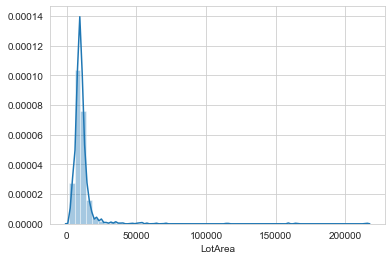

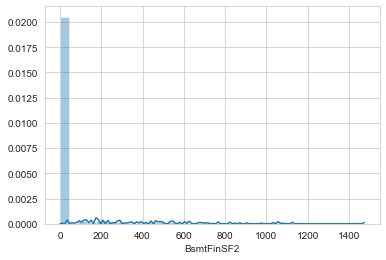

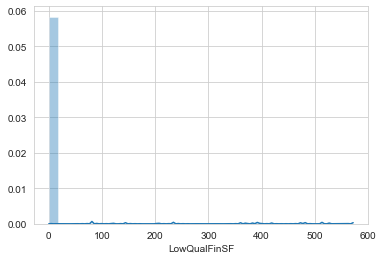

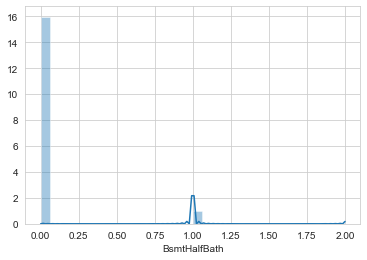

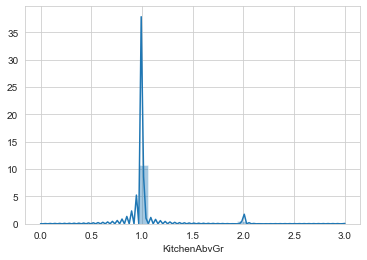

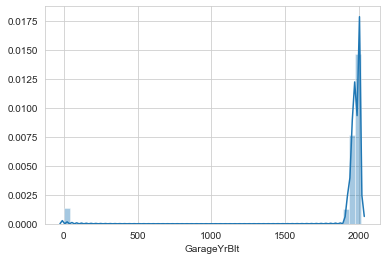

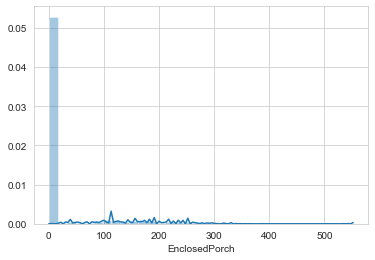

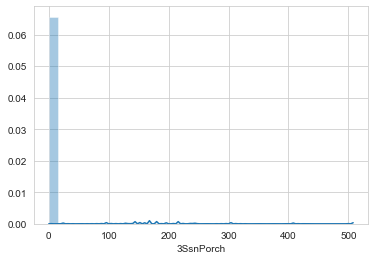

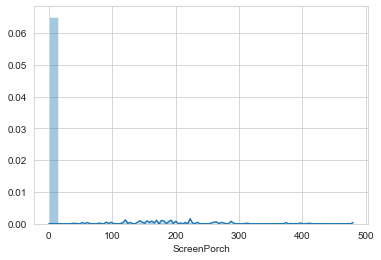

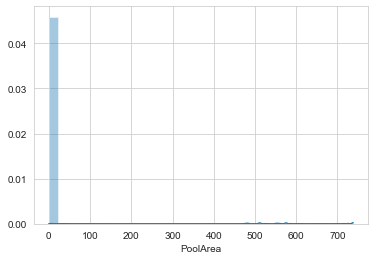

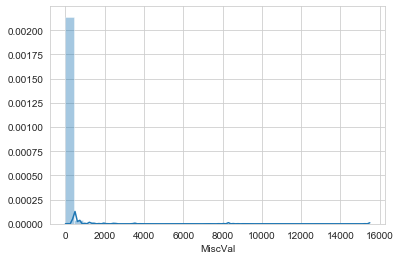

In [105]:
#some of the features are highly skewed. we could draw distribution plots to visualize each column
for cols in high_skew_list:
    plt.subplots()
    X_train_skew = X_train[cols]
    sns.distplot(X_train_skew)

In [106]:
X_train[high_skew_list]

,LotArea,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,GarageYrBlt,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
46,12822,0,0,0,1,2003.0,0,0,198,0,0
447,11214,0,0,0,1,1998.0,0,0,0,0,0
1240,8158,0,0,0,1,2003.0,0,0,0,0,0
1040,13125,682,0,0,1,1957.0,0,0,0,0,0
1060,4920,0,0,0,1,2001.0,170,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
91,8500,0,0,0,1,1961.0,0,0,0,0,0
630,9000,0,0,0,1,1937.0,293,0,0,0,0
1347,15306,0,0,0,1,2006.0,0,0,0,0,0
392,8339,0,0,0,1,1959.0,0,0,0,0,1200


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


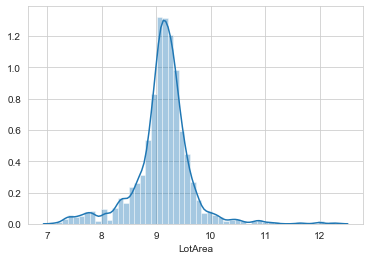

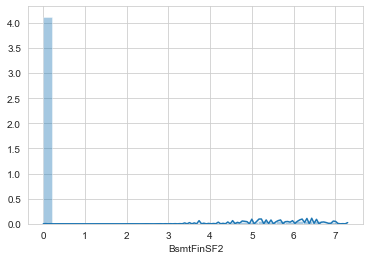

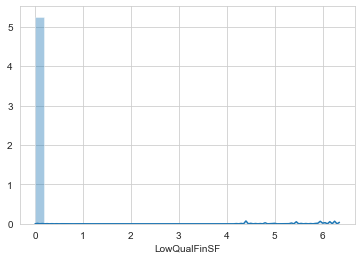

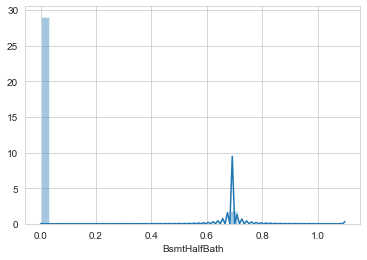

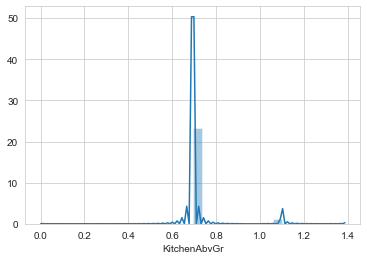

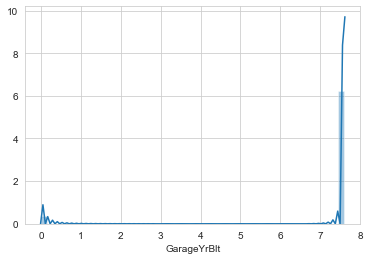

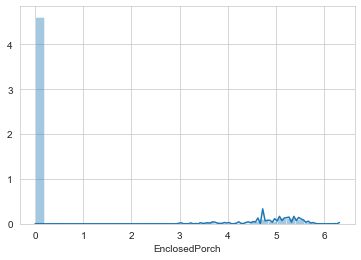

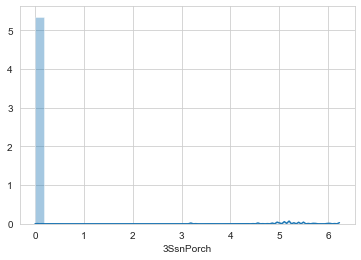

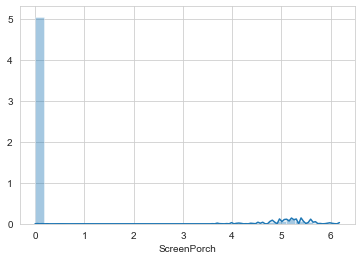

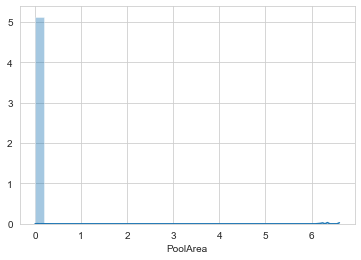

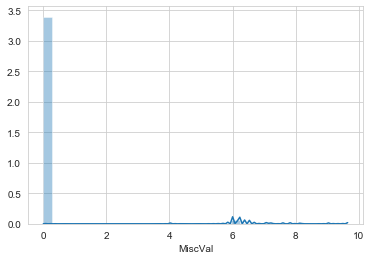

In [107]:
#high skewness may negatively impact regression models: we can perform a natural log to columns with high skew on all datasets

X_train[high_skew_list] = np.log1p(X_train[high_skew_list])
X_val[high_skew_list] = np.log1p(X_val[high_skew_list])
test[high_skew_list] = np.log1p(test[high_skew_list])

for cols in high_skew_list:
    plt.subplots()
    X_train_log = X_train[cols]
    sns.distplot(X_train_log)

In [108]:
#not all features but some of them normalized correctly
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
46,50,RL,48.000000,9.458996,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,5.293305,0.0,None,None,None,0.00000,8,2009,WD,Abnorml
447,60,RL,70.049958,9.325007,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,None,None,None,0.00000,7,2006,WD,Normal
1240,60,RL,65.000000,9.006877,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,None,None,None,0.00000,7,2008,WD,Normal
1040,20,RL,88.000000,9.482350,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0.000000,0.0,None,GdPrv,None,0.00000,1,2006,WD,Normal
1060,120,RL,41.000000,8.501267,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,None,None,None,0.00000,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,20,RL,85.000000,9.047939,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,None,GdWo,None,0.00000,12,2006,WD,Abnorml
630,70,RM,50.000000,9.105091,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0.000000,0.0,None,MnPrv,None,0.00000,6,2006,WD,Abnorml
1347,20,RL,93.000000,9.636066,Pave,NaN,IR1,HLS,AllPub,Corner,...,0.000000,0.0,None,None,None,0.00000,5,2007,New,Partial
392,20,RL,70.049958,9.028818,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,None,MnPrv,Shed,7.09091,7,2007,WD,Normal


In [110]:
#fit the new training dataset into the pipeline
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['MSSubClass', 'MSZoning', 'Street',
                                      'Alley', 'LotShape', 'LandContour',
                                      'Utilities', 'LotConfig', 'LandSlope',
                                      'Neighborhood', 'Condition1',
                                      'Condition2', 'BldgType', 'HouseStyle',
                                      'OverallQual', 'OverallCond', 'RoofStyle',
                                      'RoofMatl', 'Exterior1st', 'Exterior2nd',
                                      'MasVnrType', 'ExterQual', 'ExterCond',...
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
      

In [111]:
#score on the validation test
pipe.score(X_val, y_val)

0.9020356624145384

In [113]:
#compare with the score on the training dataset
pipe.score(X_train, y_train)

0.9139806565555773

In [1]:
#the validation score slightly, so we can keep this basis expansion!
#I could do more feature engineering if I had time to improve the score as it's still underfitting

In [145]:
#Finally, predict on the test set, unpacking the log we did on the target variable
np.exp(pipe.predict(test))

array([123950.53246221, 149299.8663722 , 193474.56306383, ...,
       183034.65504111, 130789.49036752, 227996.30863437])

In [146]:
#create a dataframe with the predictions
df = pd.DataFrame({
    'Id' : test_id,
    'SalePrice' : np.exp(pipe.predict(test))
})

In [149]:
df.head()

,Id,SalePrice
0,1461,123950.532462
1,1462,149299.866372
2,1463,193474.563064
3,1464,193076.193128
4,1465,188082.167734


In [148]:
#save it as a csv to submit to Kaggle
df.to_csv('submission.csv', index=False)